In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import calendar

In [2]:
data = pd.read_csv('mexico_crime.csv')
data

,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count
0,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,January,3
1,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,January,1
2,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,January,0
3,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,January,2
4,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,January,0
...,...,...,...,...,...,...,...,...,...
332411,2022,32,Zacatecas,Other legal interests affected (from common law),Counterfeiting,Forgery,Forgery,December,8
332412,2022,32,Zacatecas,Other legal interests affected (from common law),Environmental crimes,Environmental crimes,Against the environment,December,1
332413,2022,32,Zacatecas,Other legal interests affected (from common law),Crimes committed by public officials,Crimes committed by public servants,Crimes committed by public servants,December,20
332414,2022,32,Zacatecas,Other legal interests affected (from common law),Electoral crimes,Electoral crimes,Electoral crimes,December,0


In [3]:
df_sumatoria = data.groupby('year')['count'].sum().reset_index()
df_sumatoria

,year,count
0,2015,1657804
1,2016,1764179
2,2017,1939497
3,2018,1989935
4,2019,2071179
5,2020,1841191
6,2021,2044256
7,2022,2141979
8,2023,1839920


In [4]:
df_crimenes_anuales_entidad =  data.groupby(['year','entity'])['count'].sum().reset_index()
df_crimenes_anuales_entidad

,year,entity,count
0,2015,Aguascalientes,23212
1,2015,Baja California,119944
2,2015,Baja California Sur,21415
3,2015,Campeche,1886
4,2015,Chiapas,21618
...,...,...,...
283,2023,Tamaulipas,35568
284,2023,Tlaxcala,3279
285,2023,Veracruz de Ignacio de la Llave,73906
286,2023,Yucatán,3423


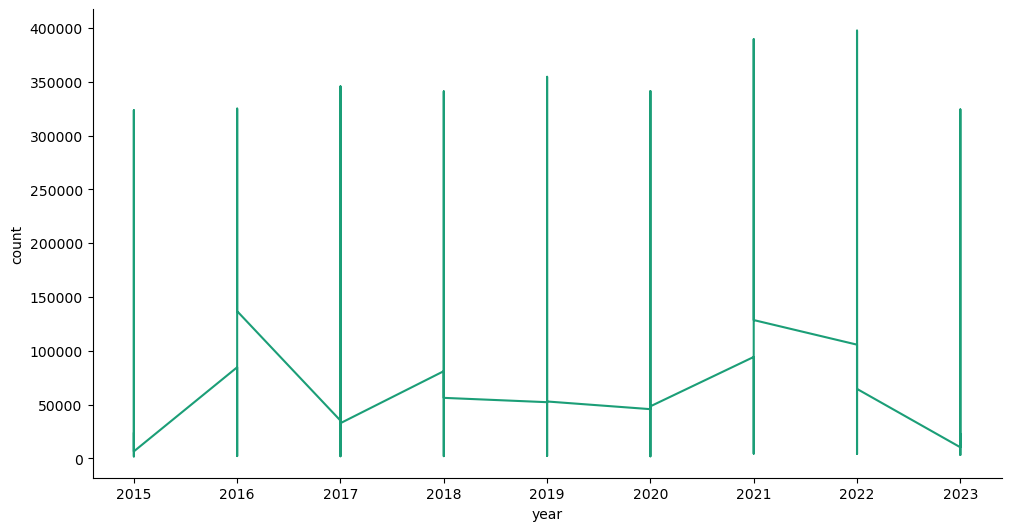

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['count']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_crimenes_anuales_entidad.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count')

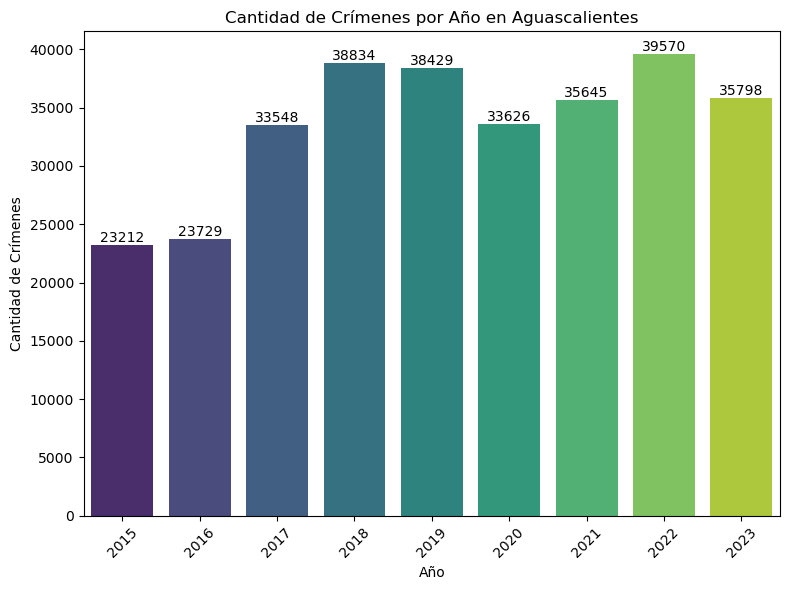

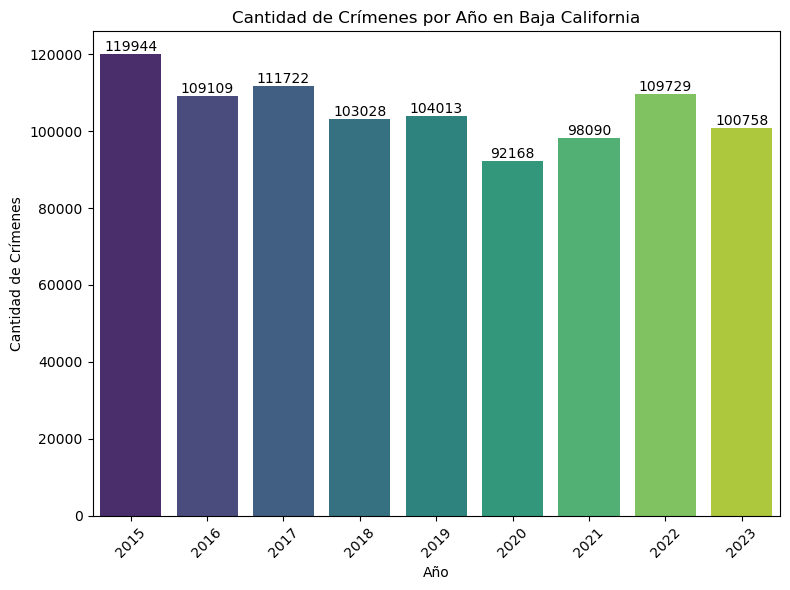

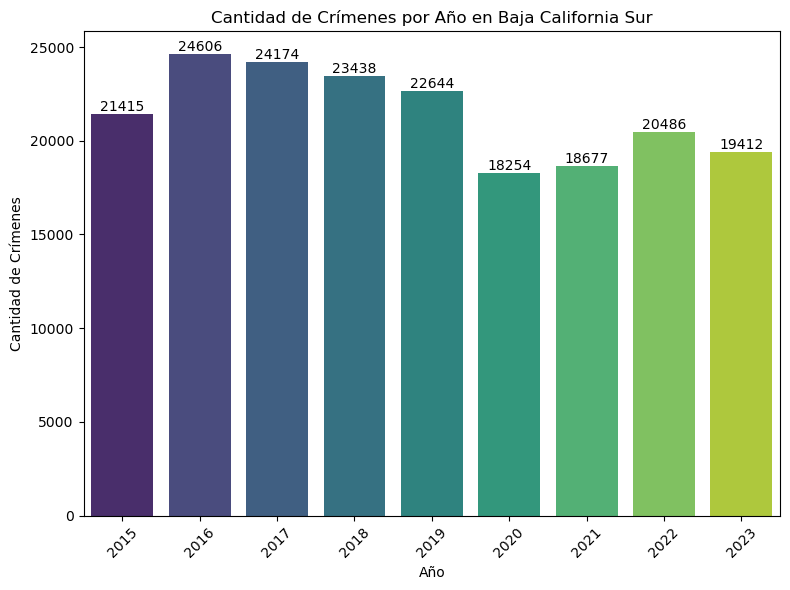

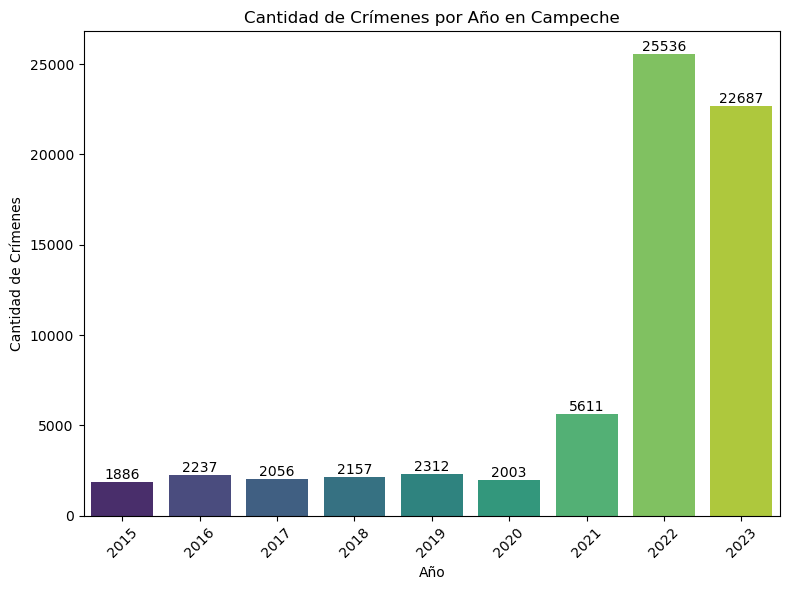

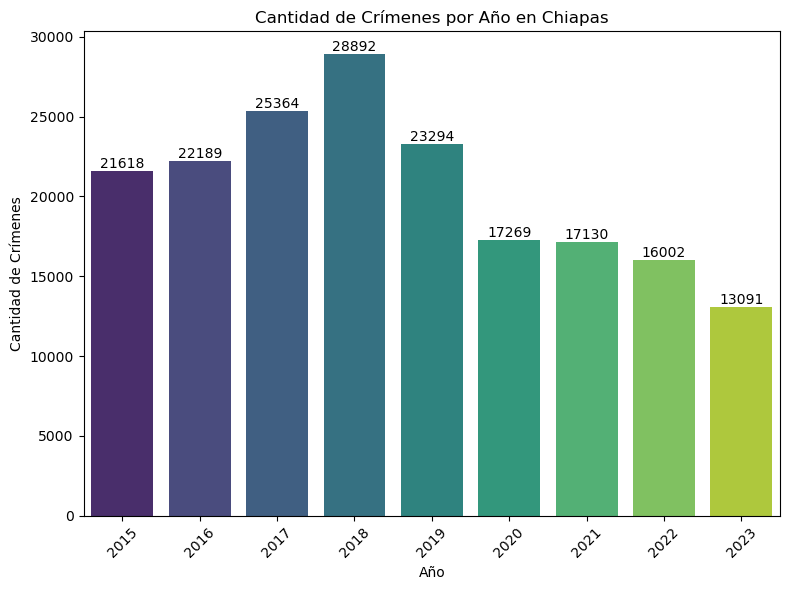

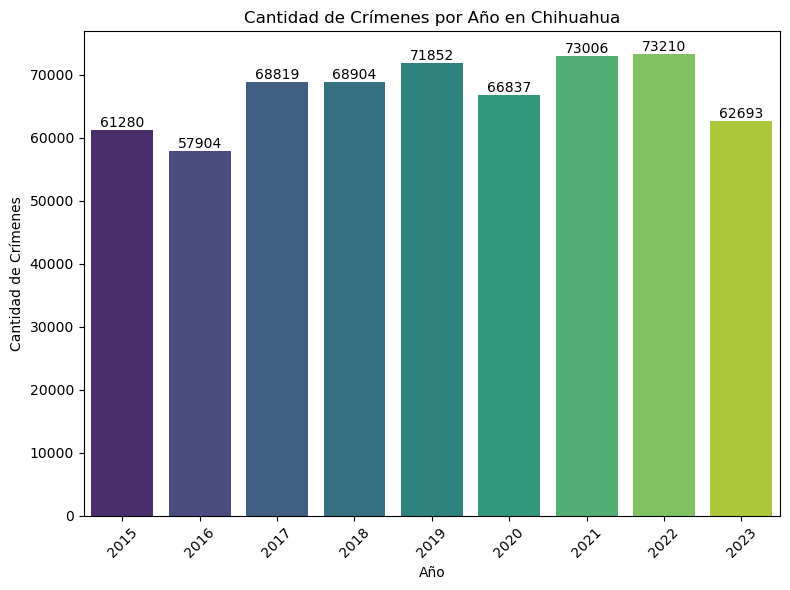

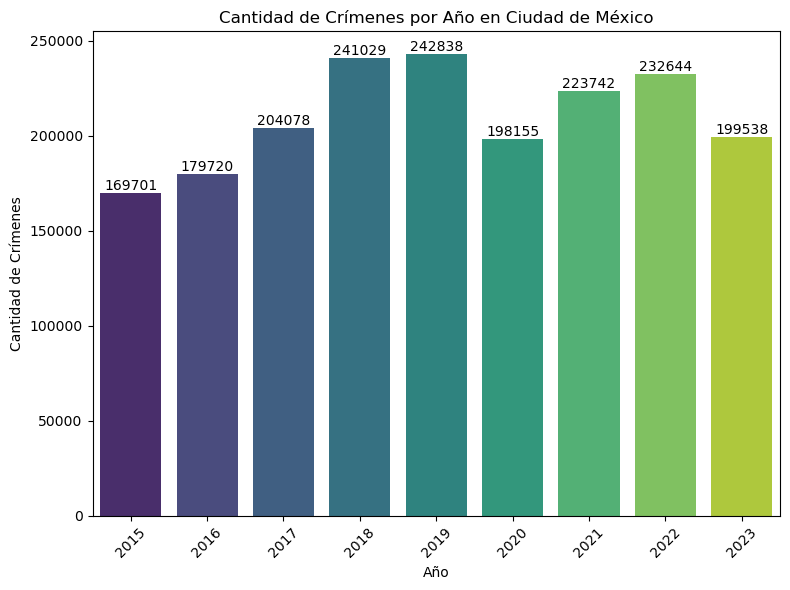

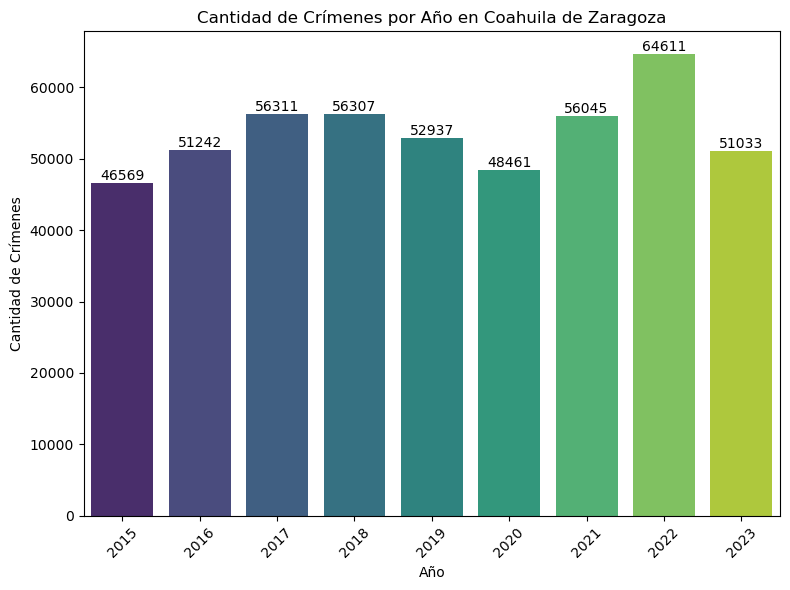

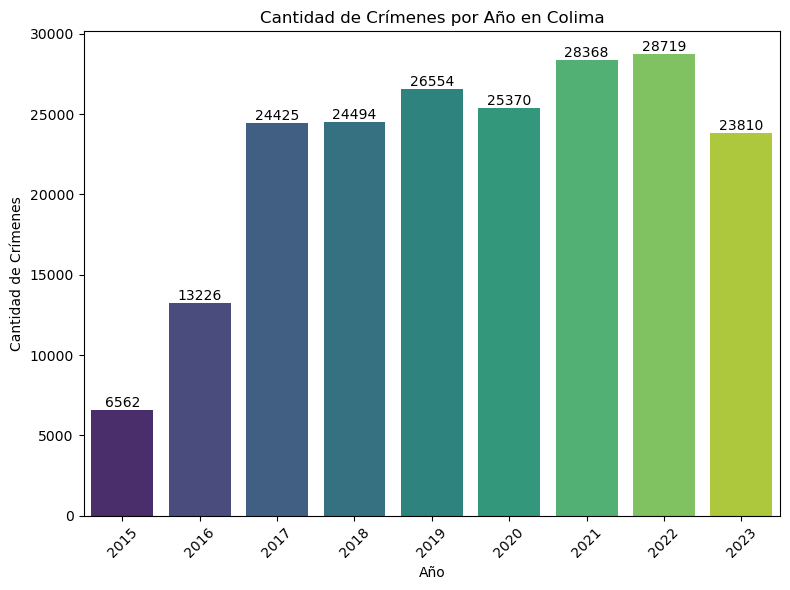

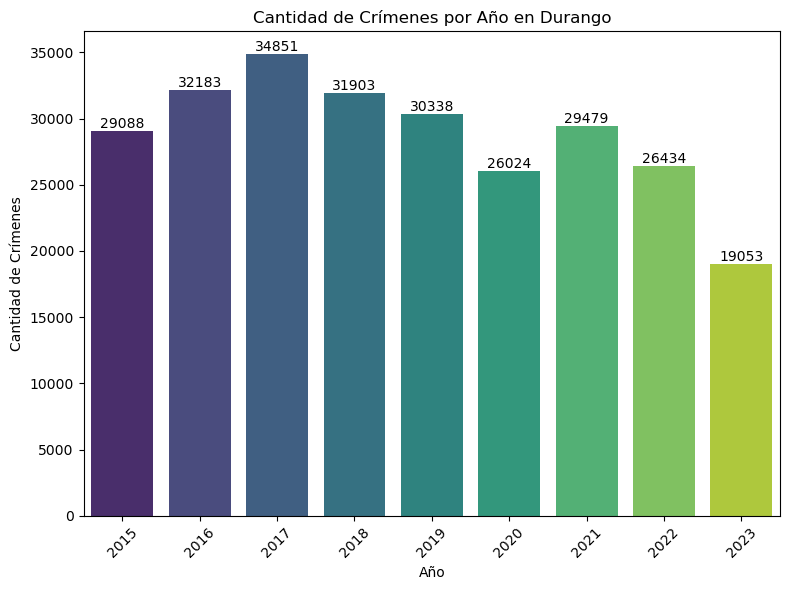

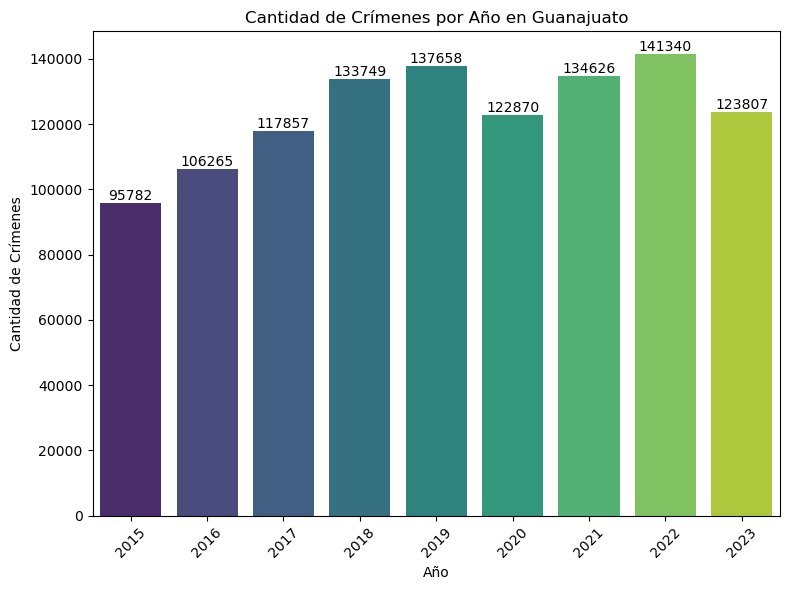

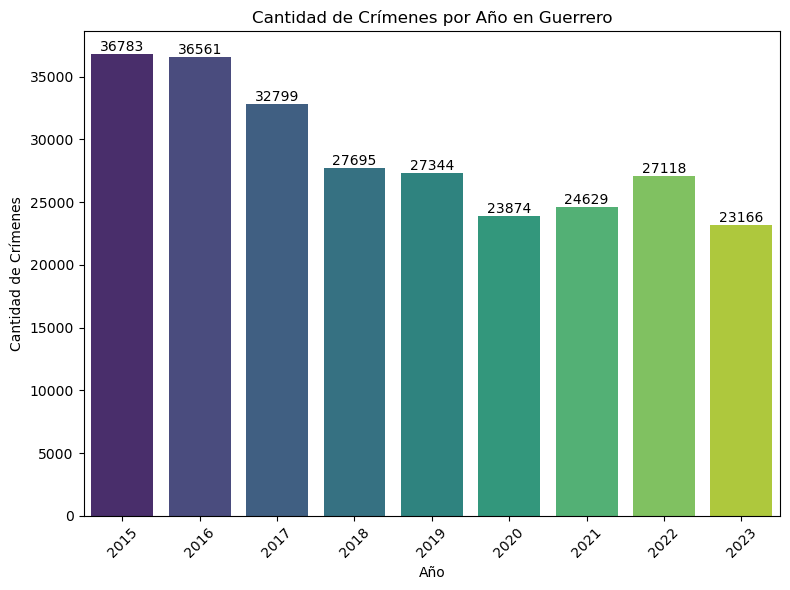

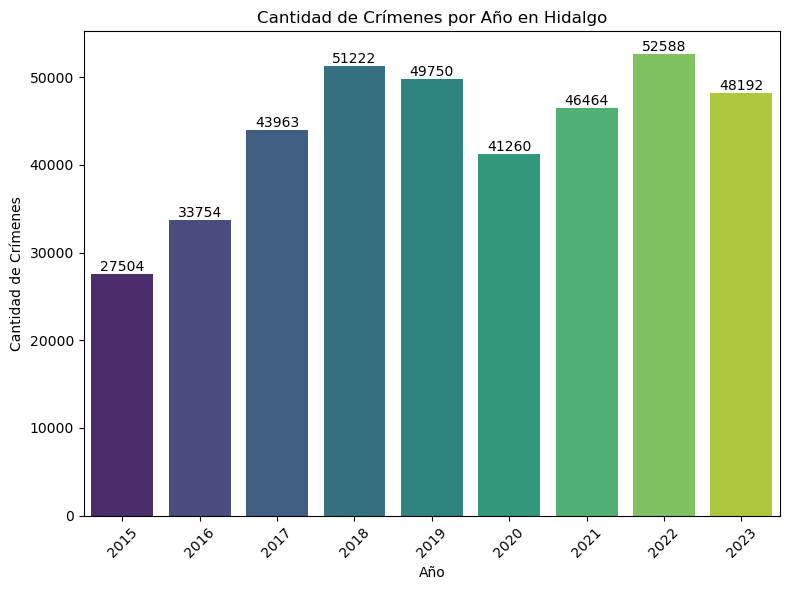

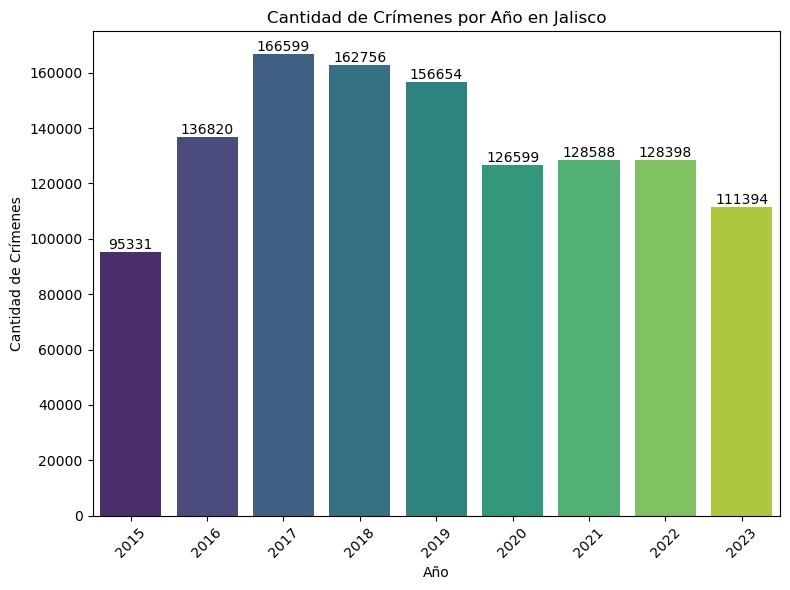

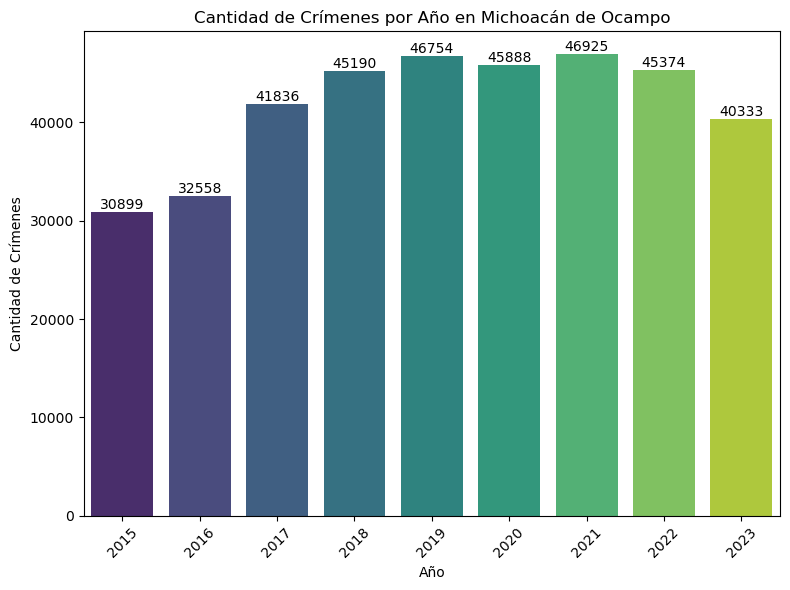

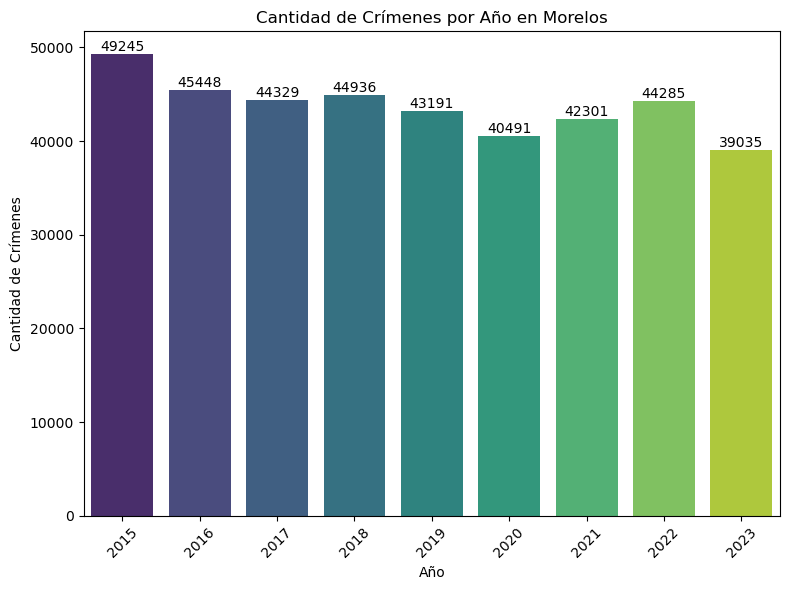

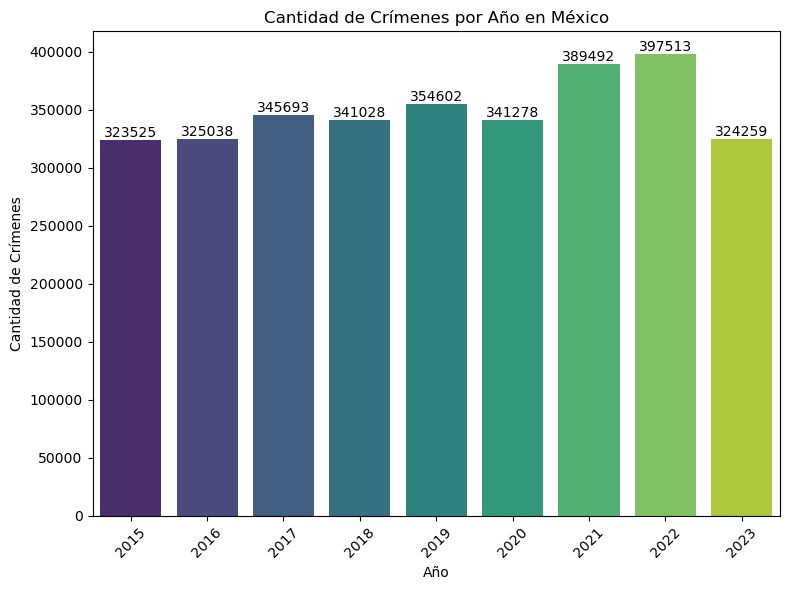

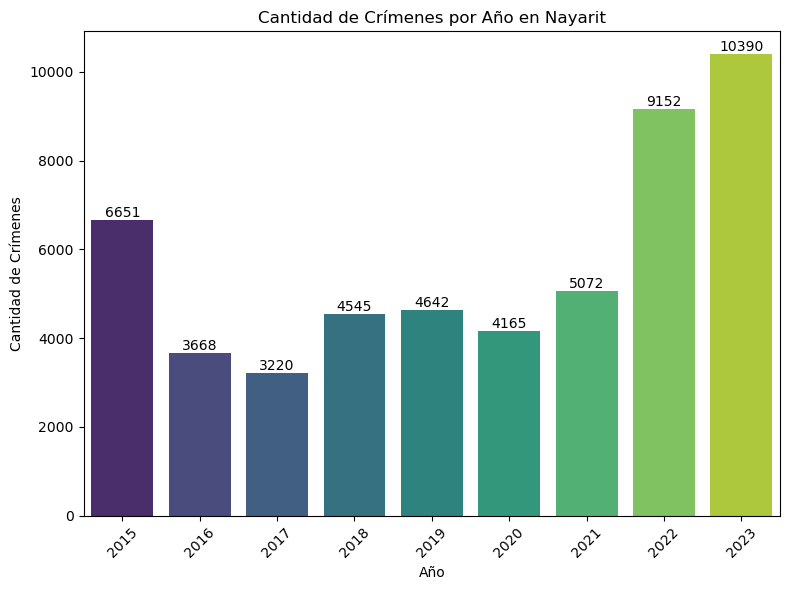

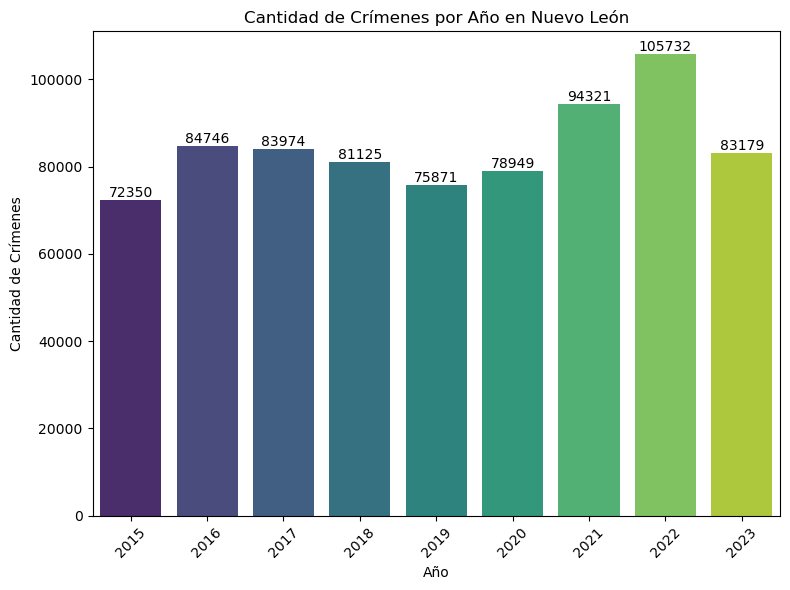

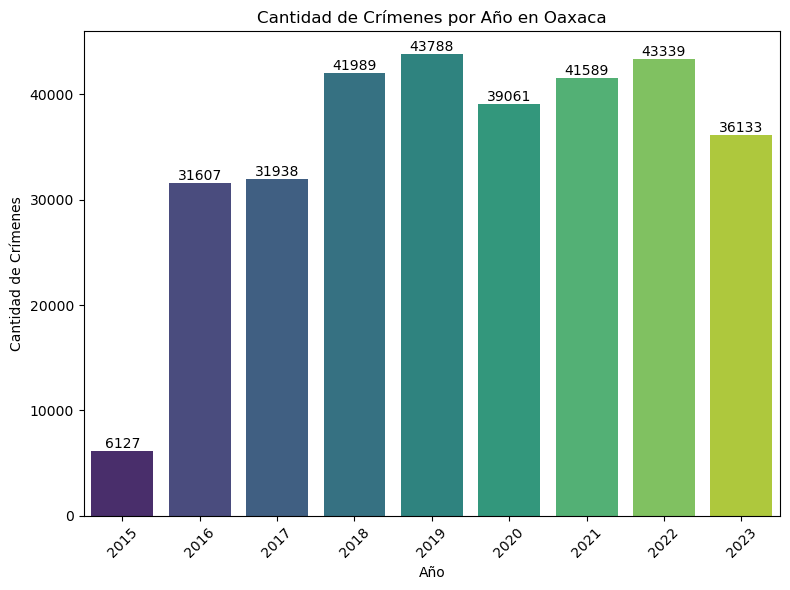

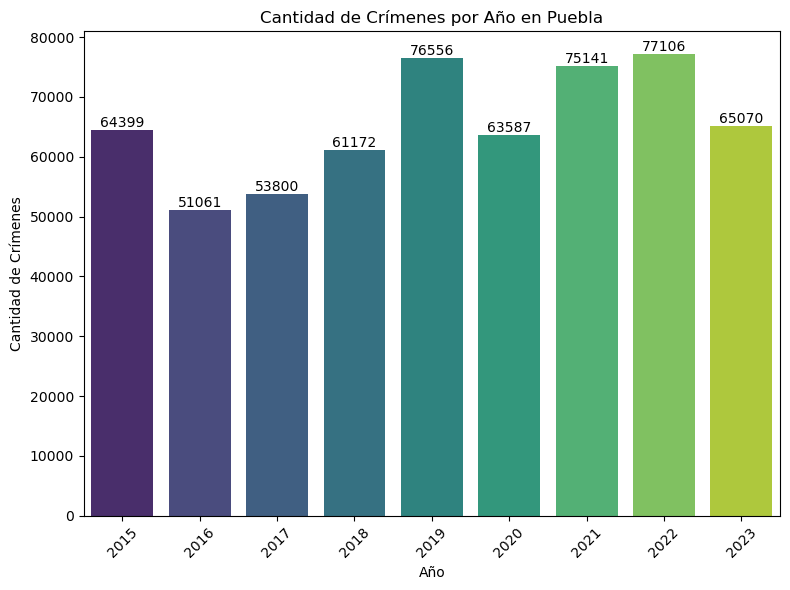

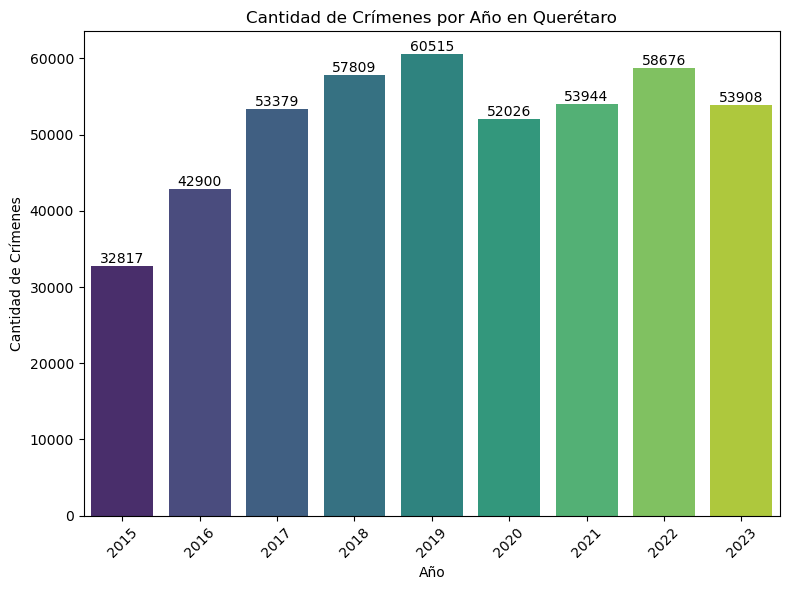

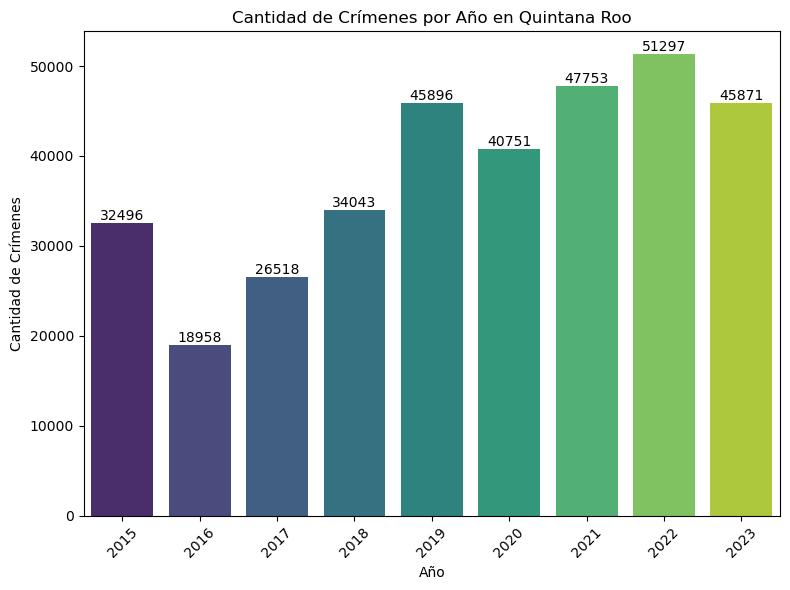

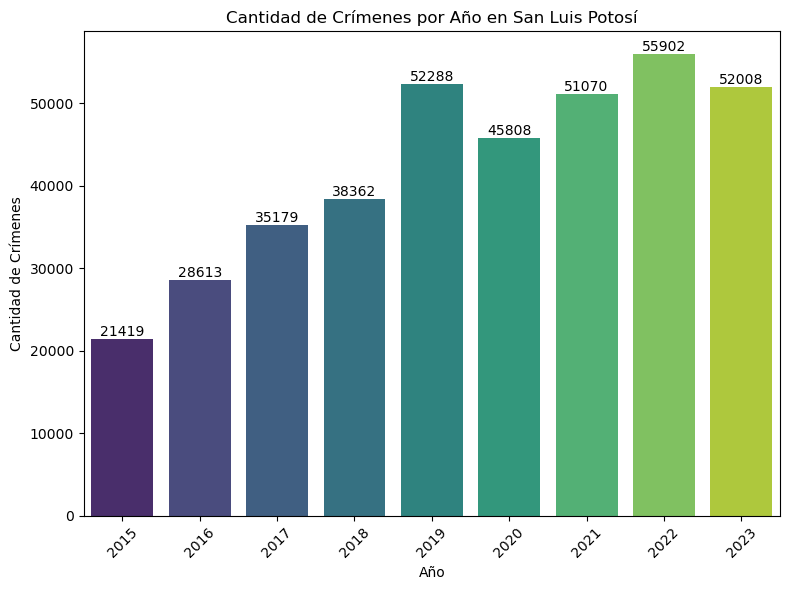

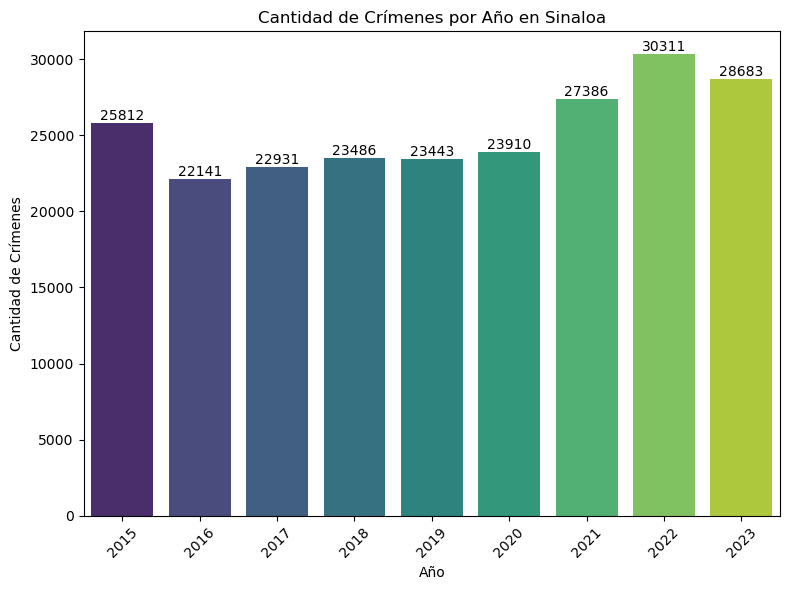

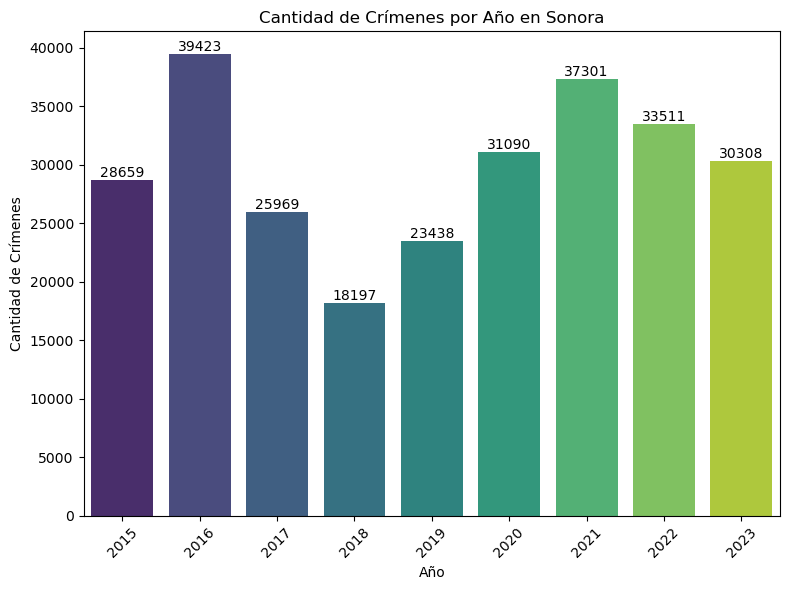

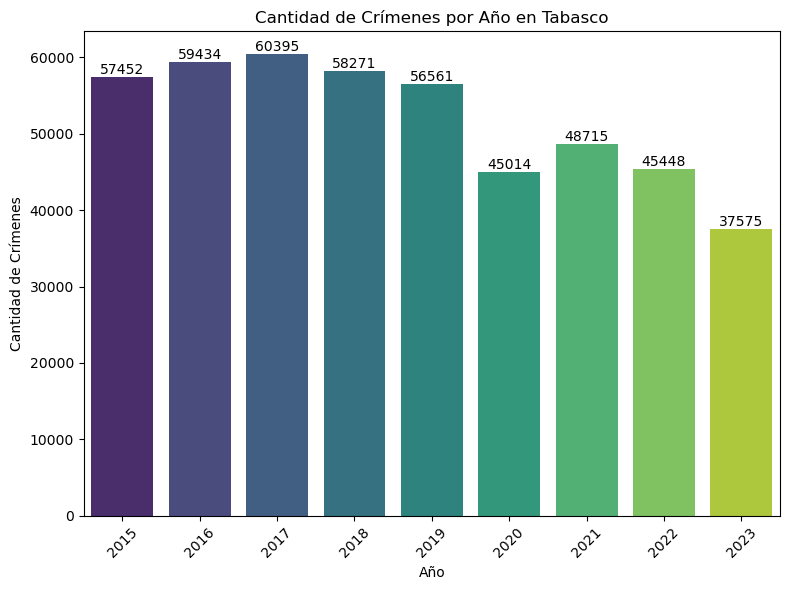

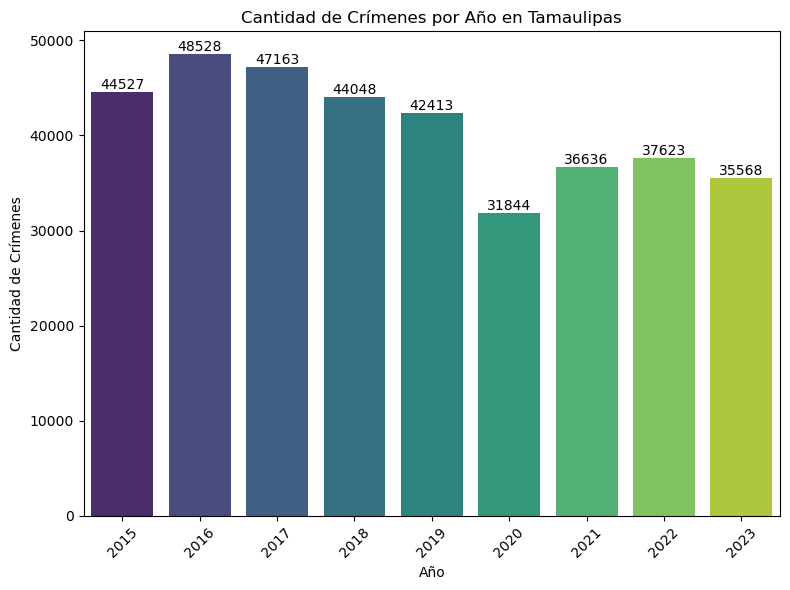

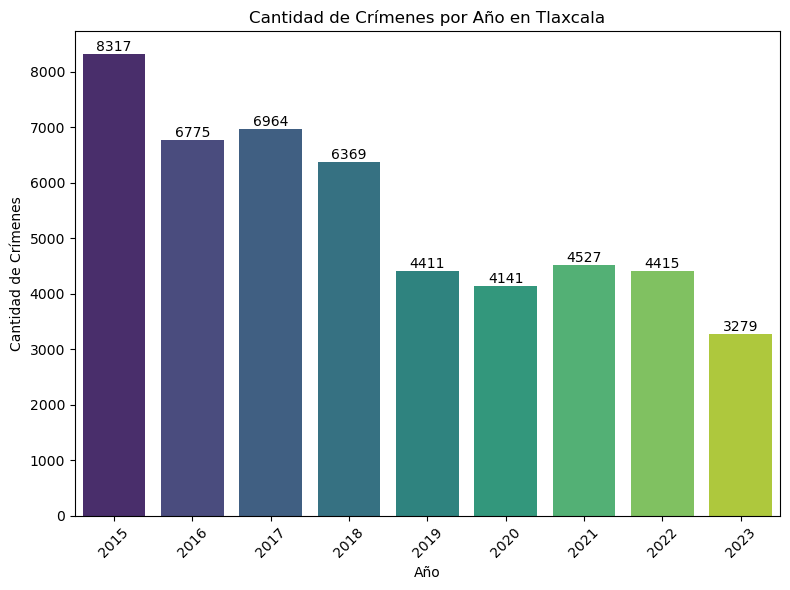

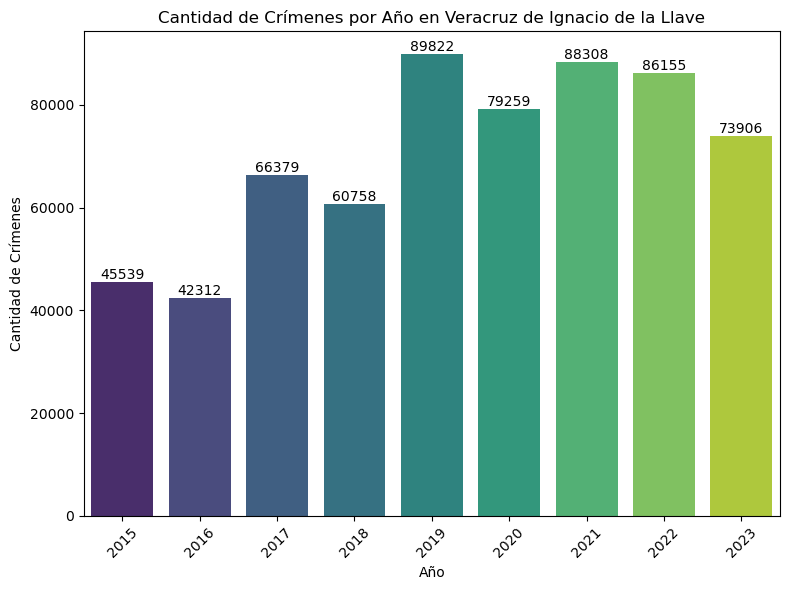

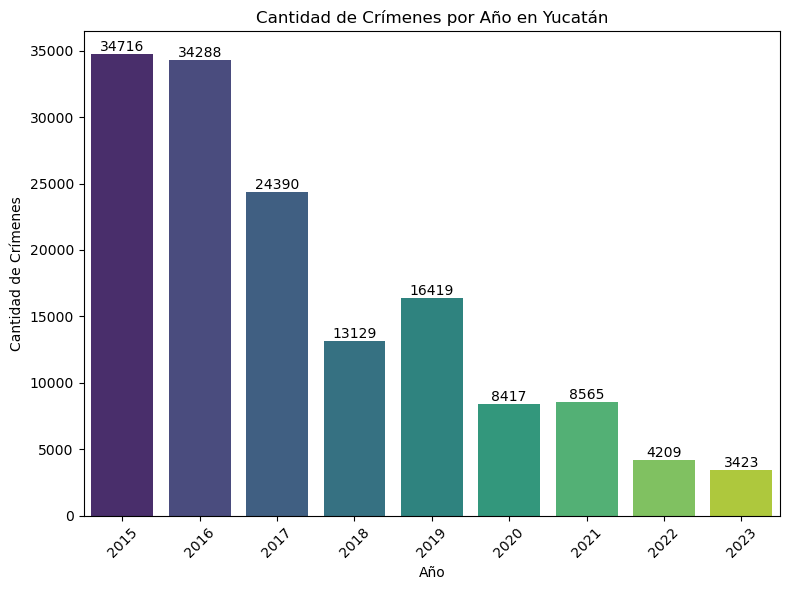

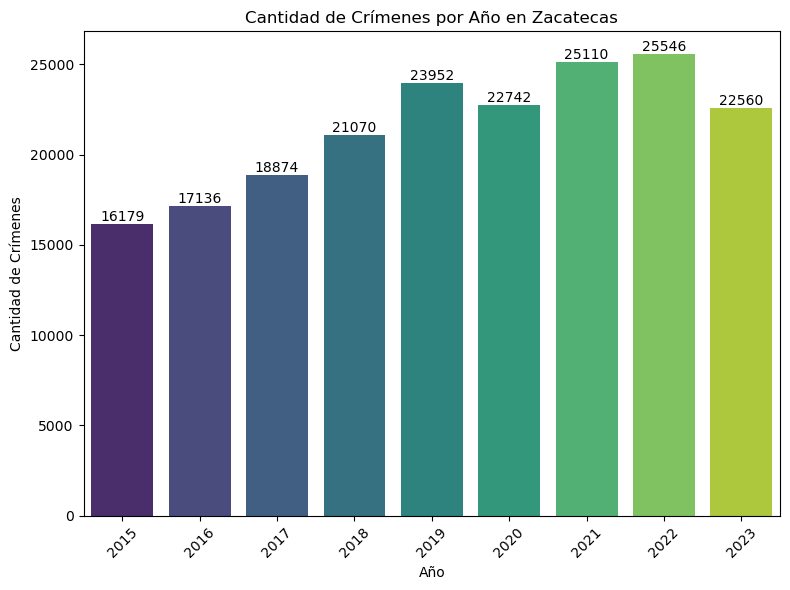

In [6]:
# Obtener la lista de estados únicos
estados = df_crimenes_anuales_entidad['entity'].unique()

# Crear una gráfica separada para cada estado
for estado in estados:
    plt.figure(figsize=(8, 6))

    # Filtrar el DataFrame para el estado actual
    df_estado = df_crimenes_anuales_entidad[df_crimenes_anuales_entidad['entity'] == estado]

    # Crear la gráfica
    sns.barplot(data=df_estado, x="year", y="count", palette="viridis")
    plt.title(f"Cantidad de Crímenes por Año en {estado}")
    plt.xlabel("Año")
    plt.ylabel("Cantidad de Crímenes")
    plt.xticks(rotation=45)

     # Agregar los valores encima de los puntos
    for i, count in enumerate(df_estado['count']):
        plt.text(i, count, str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [7]:
df_anual = data.groupby(['year','entity'])['count'].sum().reset_index()
df_anual

,year,entity,count
0,2015,Aguascalientes,23212
1,2015,Baja California,119944
2,2015,Baja California Sur,21415
3,2015,Campeche,1886
4,2015,Chiapas,21618
...,...,...,...
283,2023,Tamaulipas,35568
284,2023,Tlaxcala,3279
285,2023,Veracruz de Ignacio de la Llave,73906
286,2023,Yucatán,3423


In [8]:
# Inicializar listas para almacenar los resultados
incremento_por_anio = []

# Iterar sobre cada estado
for estado in estados:
    # Filtrar el DataFrame para el estado actual
    df_estado = df_anual[df_anual['entity'] == estado]

    # Ordenar el DataFrame por año
    df_estado = df_estado.sort_values(by='year')

    # Calcular el incremento por año
    incremento_anual = []
    for i in range(1, len(df_estado)):
        cantidad_anio_actual = df_estado.iloc[i]['count']
        cantidad_anio_anterior = df_estado.iloc[i - 1]['count']
        porcentaje_incremento = ((cantidad_anio_actual - cantidad_anio_anterior) / cantidad_anio_anterior) * 100
        incremento_anual.append(porcentaje_incremento)

    # Agregar el incremento por año al resultado final
    incremento_por_anio.append(incremento_anual)

# Mostrar el resultado
print(incremento_por_anio)


[[2.2272962260899534, 41.37974630199334, 15.756527959938, -1.042900551063501, -12.498373624085977, 6.004282400523405, 11.011362042362183, -9.532474096537781], [-9.033382245047688, 2.39485285356845, -7.781815577952418, 0.9560507823116047, -11.387999576975954, 6.425223504904089, 11.86563360179427, -8.175596241649883], [14.900770487975718, -1.755669348939283, -3.0445933647720693, -3.3876610632306514, -19.387034092916448, 2.3173003177385776, 9.685709696418055, -5.24260470565264], [18.61081654294804, -8.09119356280733, 4.912451361867705, 7.185906351414001, -13.365051903114185, 180.12980529206192, 355.1060417037961, -11.156798245614036], [2.6413174206679617, 14.30889179323088, 13.909478000315408, -19.37560570400111, -25.865029621361725, -0.8049105333256124, -6.584938704028021, -18.191476065491813], [-5.509138381201044, 18.850165791655154, 0.12351240209825774, 4.278416347381865, -6.979624784278796, 9.229917560632583, 0.27942908802016275, -14.365523835541595], [5.903913353486426, 13.5533051413

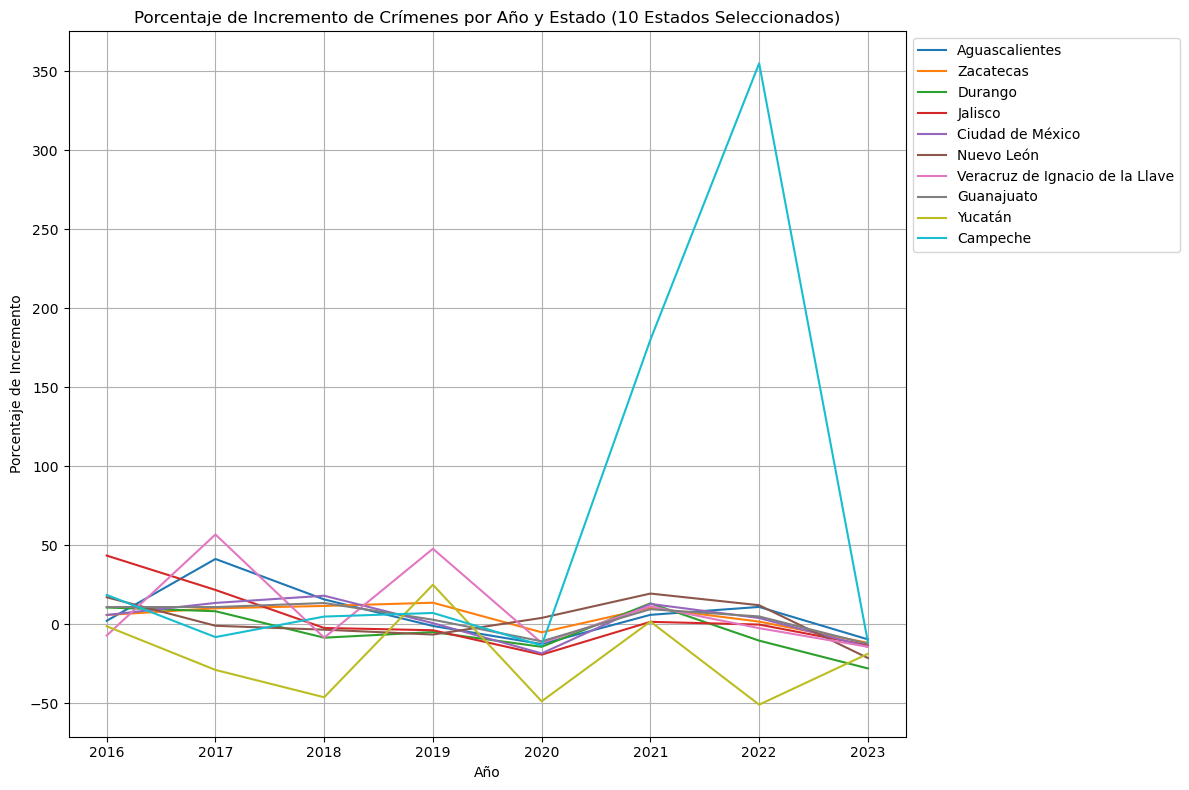

In [24]:
# Estados seleccionados
estados_seleccionados = ['Aguascalientes', 'Zacatecas', 'Durango', 'Jalisco', 'Ciudad de México', 'Nuevo León', 'Veracruz de Ignacio de la Llave', 'Guanajuato', 'Yucatán', 'Campeche']

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Iterar sobre cada estado seleccionado y sus porcentajes de incremento por año
for i, estado in enumerate(estados_seleccionados):
    # Obtener el índice del estado en la lista de estados
    indice_estado = list(estados).index(estado)

    # Graficar la línea para el estado actual con un color diferente de la paleta 'tab10'
    plt.plot(range(2016, 2024), incremento_por_anio[indice_estado], label=estado, color=plt.cm.tab10(i))

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Porcentaje de Incremento')
plt.title('Porcentaje de Incremento de Crímenes por Año y Estado (10 Estados Seleccionados)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))  # Añadir leyenda fuera de la gráfica
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [10]:
# Encontrar el año con más crímenes por estado
max_year_per_state = df_crimenes_anuales_entidad.loc[df_crimenes_anuales_entidad.groupby('entity')['count'].idxmax()][['entity', 'year', 'count']].reset_index(drop=True)

# Encontrar el año con el menor número de crímenes por estado
min_year_per_state = df_crimenes_anuales_entidad.loc[df_crimenes_anuales_entidad.groupby('entity')['count'].idxmin()][['entity', 'year', 'count']].reset_index(drop=True)

# Fusionar los DataFrames para tener una fila por estado con la información del año con más y menos crímenes
year_and_state = pd.merge(max_year_per_state, min_year_per_state, on='entity', suffixes=('_max', '_min'))

year_and_state
# year_and_state.set_index('entity').plot(kind='bar')

,entity,year_max,count_max,year_min,count_min
0,Aguascalientes,2022,39570,2015,23212
1,Baja California,2015,119944,2020,92168
2,Baja California Sur,2016,24606,2020,18254
3,Campeche,2022,25536,2015,1886
4,Chiapas,2018,28892,2023,13091
5,Chihuahua,2022,73210,2016,57904
6,Ciudad de México,2019,242838,2015,169701
7,Coahuila de Zaragoza,2022,64611,2015,46569
8,Colima,2022,28719,2015,6562
9,Durango,2017,34851,2023,19053


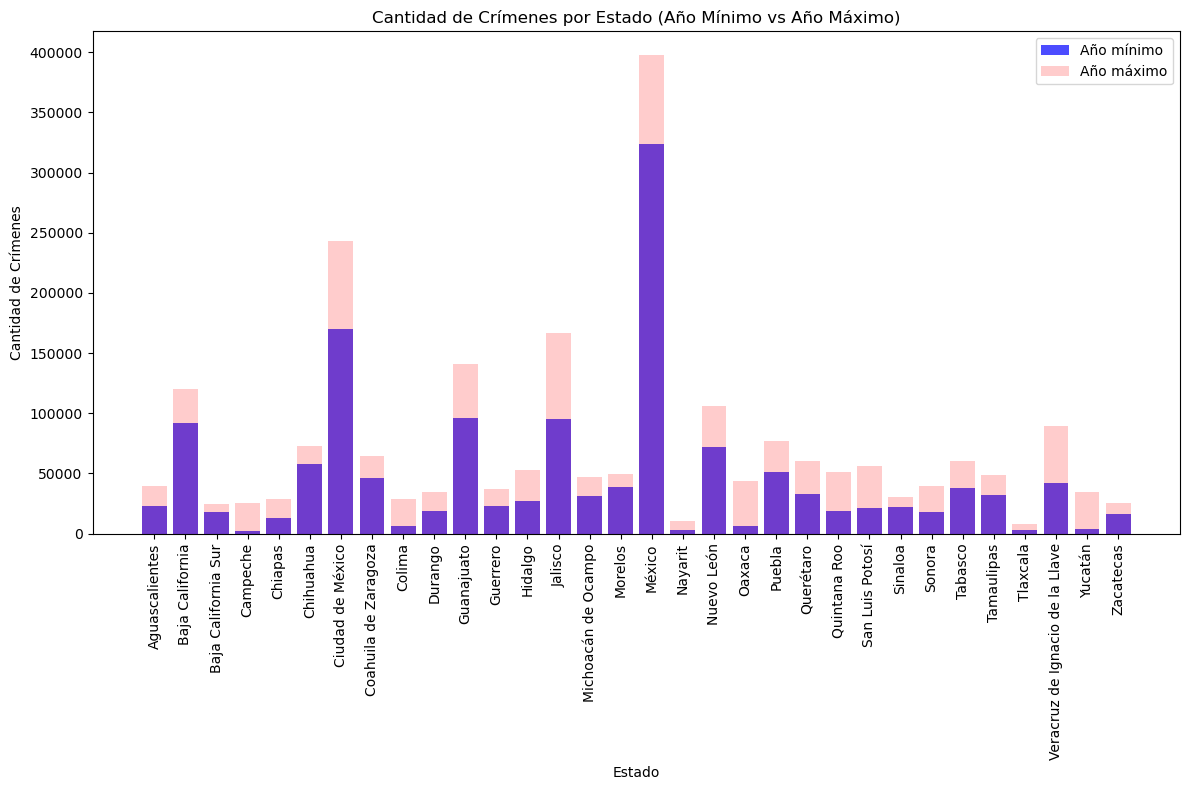

In [11]:
# Graficar
plt.figure(figsize=(12, 8))

# Barra para el año mínimo
plt.bar(year_and_state['entity'], year_and_state['count_min'], color='blue', alpha=0.7, label='Año mínimo')

# Barra para el año máximo
plt.bar(year_and_state['entity'], year_and_state['count_max'], color='red', alpha=0.2, label='Año máximo')

# Etiquetas y título
plt.xlabel('Estado')
plt.ylabel('Cantidad de Crímenes')
plt.title('Cantidad de Crímenes por Estado (Año Mínimo vs Año Máximo)')
plt.xticks(rotation=90)
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [12]:
df_estatal = data[data['entity']=='Oaxaca'].groupby('year')['count'].sum().reset_index()
#Filtrado para los valores para filtrado por entidad, conservando columna de ['year']
# df_estatal = data[data['entity']=='Aguascalientes'].groupby(['year', 'entity'])['count'].sum().reset_index()
df_estatal

,year,count
0,2015,6127
1,2016,31607
2,2017,31938
3,2018,41989
4,2019,43788
5,2020,39061
6,2021,41589
7,2022,43339
8,2023,36133


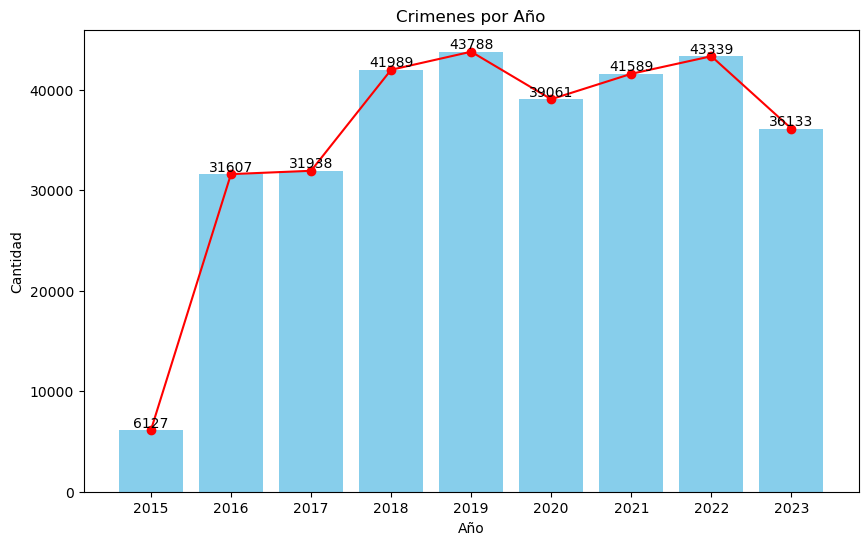

In [13]:
#Grafica de barras
year = df_estatal['year']
count =  df_estatal['count']
# Graficar
plt.figure(figsize=(10, 6))
plt.bar(year, count, color='skyblue')
# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Crimenes por Año')

for i in range(len(year)):
    plt.text(year[i], count[i], str(count[i]), ha='center', va='bottom')

# Graficar línea
plt.plot(year, count, marker='o', color='red', linestyle='-')

# Mostrar todos los años en el eje x
plt.xticks(year)

# Mostrar la gráfica
plt.show()

In [14]:
df_entity = data[data['entity']=='Aguascalientes']
df_entity

,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count
0,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,January,3
1,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,January,1
2,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,January,0
3,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,January,2
4,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,January,0
...,...,...,...,...,...,...,...,...,...
329373,2022,1,Aguascalientes,Other legal interests affected (from common law),Counterfeiting,Forgery,Forgery,December,43
329374,2022,1,Aguascalientes,Other legal interests affected (from common law),Environmental crimes,Environmental crimes,Against the environment,December,10
329375,2022,1,Aguascalientes,Other legal interests affected (from common law),Crimes committed by public officials,Crimes committed by public servants,Crimes committed by public servants,December,32
329376,2022,1,Aguascalientes,Other legal interests affected (from common law),Electoral crimes,Electoral crimes,Electoral crimes,December,0


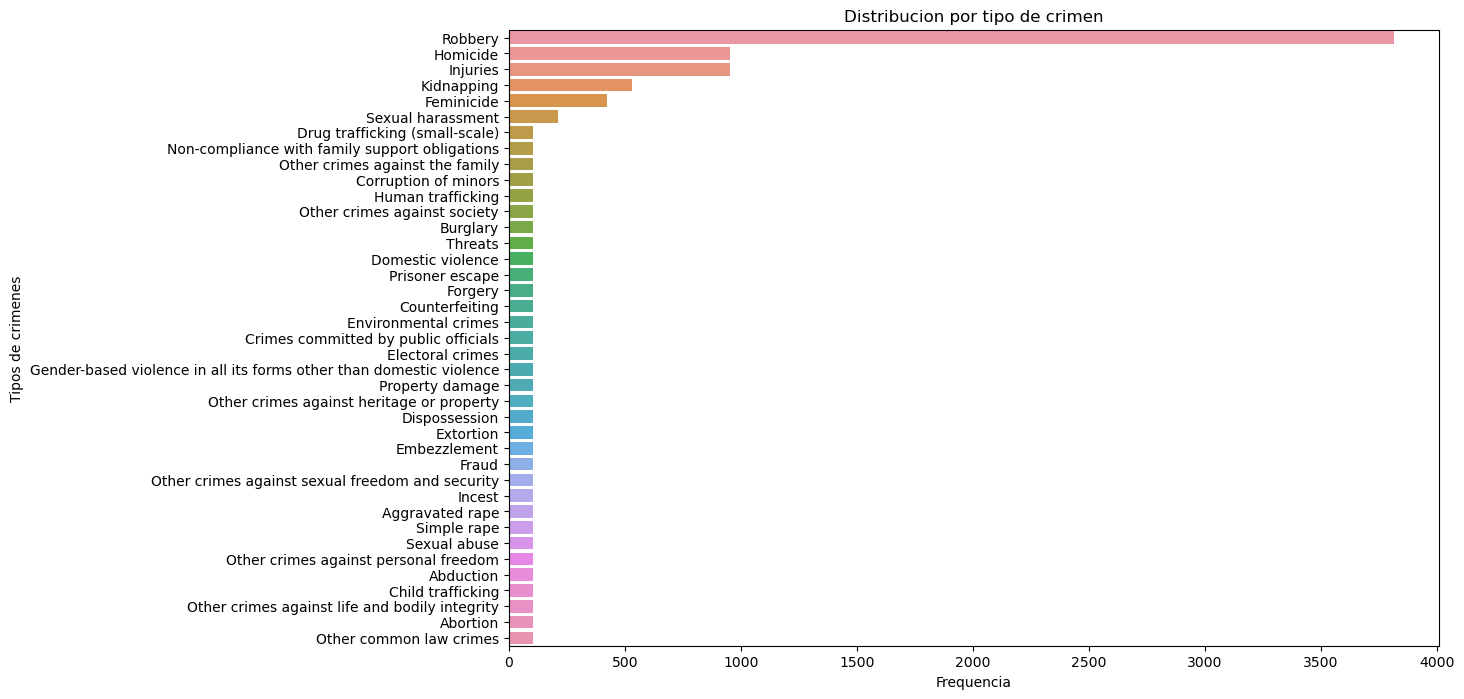

In [15]:
valores_crimenes = df_entity['type_of_crime'].value_counts()
valores_crimenes
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=valores_crimenes.values, y=valores_crimenes.index)

plt.title("Distribucion por tipo de crimen")
plt.xlabel("Frequencia")
plt.ylabel("Tipos de crimenes")
plt.show()

In [16]:
# Filtrar el DataFrame para obtener solo feminicidios y homicidios
df_state_mas = df_entity[df_entity['type_of_crime'] == 'Homicide']
df_state_fem = df_entity[df_entity['type_of_crime'] == 'Feminicide']
df = pd.concat([df_state_mas, df_state_fem])
df

,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count
0,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,January,3
1,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,January,1
2,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,January,0
3,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,January,2
4,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,January,0
...,...,...,...,...,...,...,...,...,...
326165,2021,1,Aguascalientes,Life and bodily integrity,Feminicide,Feminicide,Not specified,December,0
329298,2022,1,Aguascalientes,Life and bodily integrity,Feminicide,Feminicide,With firearm,December,0
329299,2022,1,Aguascalientes,Life and bodily integrity,Feminicide,Feminicide,With sharp weapon,December,0
329300,2022,1,Aguascalientes,Life and bodily integrity,Feminicide,Feminicide,With another element,December,1


<Figure size 1000x600 with 0 Axes>

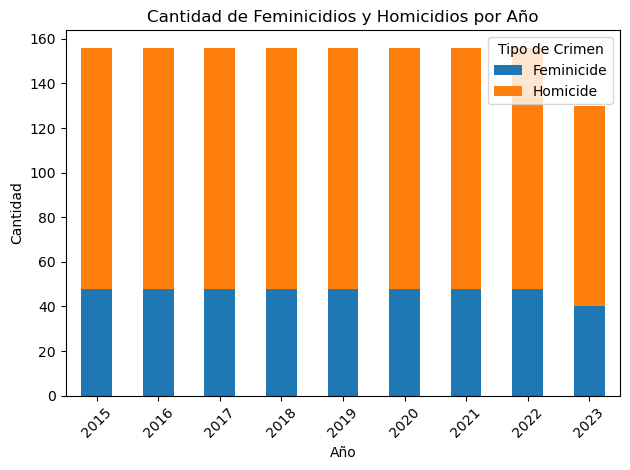

In [17]:
# Agrupar los datos por año y tipo de crimen y contar la cantidad de cada tipo de crimen en cada año
df_grouped = df.groupby(['year', 'type_of_crime']).size().unstack(fill_value=0)

# Graficar
plt.figure(figsize=(10, 6))
df_grouped.plot(kind='bar', stacked=True)
plt.title('Cantidad de Feminicidios y Homicidios por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Crimen')
plt.tight_layout()
plt.show()

In [18]:
# Filtrar el DataFrame para obtener solo feminicidios y homicidios
df_filtered = df_entity[df_entity['type_of_crime'].isin(['Feminicide', 'Homicide'])]

# Agrupar los datos por año y tipo de crimen y contar la cantidad de cada tipo de crimen en cada año
df_grouped = df_filtered.groupby(['year', 'type_of_crime']).size().unstack(fill_value=0)

# Mostrar el DataFrame resultante
print(df_grouped)

type_of_crime  Feminicide  Homicide
year                               
2015                   48       108
2016                   48       108
2017                   48       108
2018                   48       108
2019                   48       108
2020                   48       108
2021                   48       108
2022                   48       108
2023                   40        90


<Figure size 2600x800 with 0 Axes>

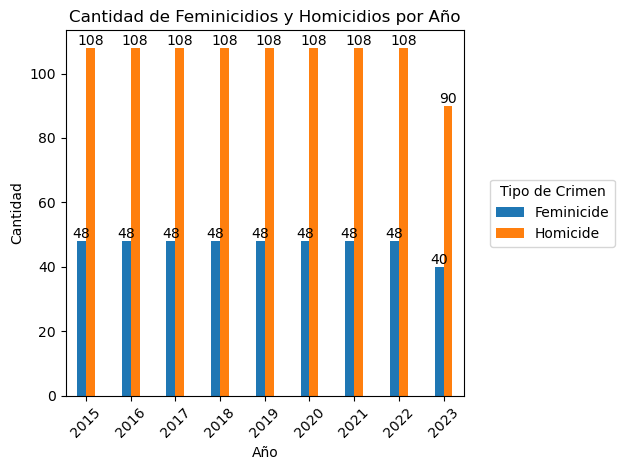

In [19]:
# Agrupar los datos por año y tipo de crimen y contar la cantidad de cada tipo de crimen en cada año
df_grouped = df.groupby(['year', 'type_of_crime']).size().unstack(fill_value=0)

# Graficar
plt.figure(figsize=(26, 8))  # Ajustar el tamaño de la figura (ancho, alto)
ax = df_grouped.plot(kind='bar', stacked=False, position=0.5, width=0.4)
plt.title('Cantidad de Feminicidios y Homicidios por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

# Colocar la leyenda a un lado de la gráfica
plt.legend(title='Tipo de Crimen', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Anotar los valores encima de cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

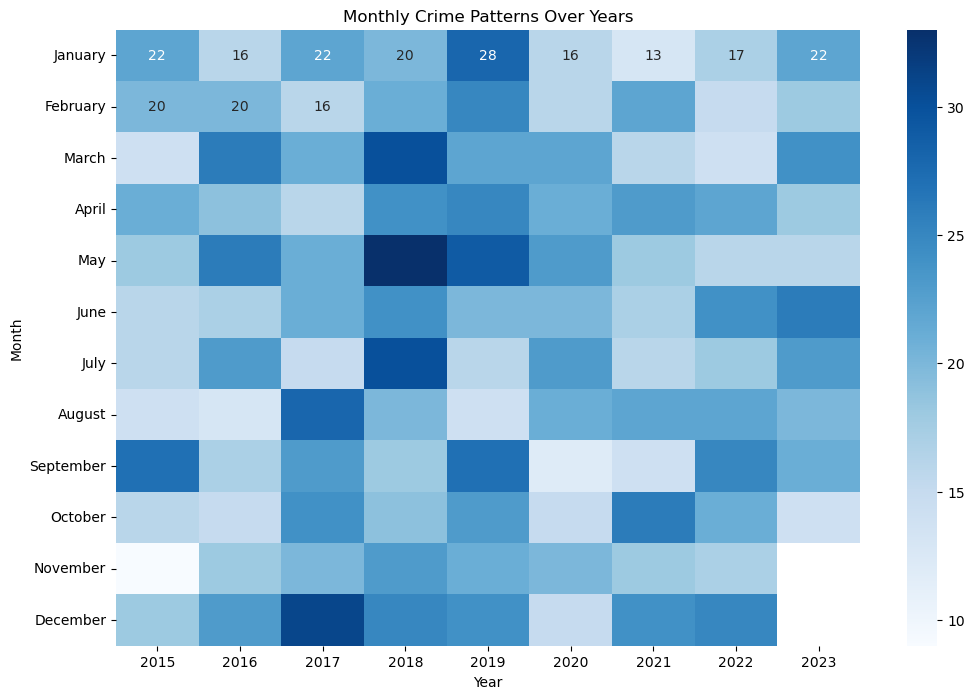

In [20]:
# Creating a dictionary to map month names to numbers
count_per_mouth = {
    month: index for index, month in enumerate(calendar.month_name) if month
}

# Mapping month names to numbers in the DataFrame
df["month_num"] = df["month"].apply(lambda x: count_per_mouth[x])

# Creating a pivot table with numeric months
pivot_table = df.pivot_table(
    values="count", index="month_num", columns="year", aggfunc="sum"
)
# Sorting index to ensure months are in order
pivot_table = pivot_table.sort_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    yticklabels=list(calendar.month_name)[1:],
)
plt.title("Monthly Crime Patterns Over Years")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()